 <h1>Applied Artificial Intelligence Practical Practice Questions</h1>
 
 1. Depth First Search (DFS)
 2. Breadth First Search (BFS)
 3. A* Search Algorithm
 4. Min-Max Algorithm
 5. Min-Max with Alpha-Beta Pruning
 6. EDA on a dataset (minimum 2K rows)
 7. NLTK Implementation
 
 ***
 ***
 

<h2>1. Depth First Search (DFS)</h2>

<h3>EXAMPLE GRAPH</h3>

<pre>
              1
           /  |  \
          /   |   \             
         /    |    \
        /     |     \
       /      |      \
      /       |       \
     2        3        4
   / | \     /  \       \
  /  |  \   /    \       \
 5   6   7 8      9      10
    /  \          |
   /    \         |
  11    12        13
</pre>

In [1]:
# Storing Graph in Python Dictionary
graph = {
    '1' : ['2', '3', '4'],
    '2' : ['5', '6', '7'],
    '3' : ['8', '9'],
    '4' : ['10'],
    '5' : [],
    '6' : ['11', '12'],
    '7' : [],
    '8' : [],
    '9' : ['13'],
    '10' : [],
    '11' : [],
    '12' : [],
    '13' : []
}

visited = set() # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node):  #function for dfs 
    if node not in visited:
        print (node, end = ', ')
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
print("Following is the Depth-First Search")
dfs(visited, graph, '1')

Following is the Depth-First Search
1, 2, 5, 6, 11, 12, 7, 3, 8, 9, 13, 4, 10, 

***

<h2>2. Breadth First Search (BFS)</h2>

In [2]:
visited = [] 
queue = []     

def bfs(visited, graph, node): 
    visited.append(node)
    queue.append(node)

    while queue:          
        m = queue.pop(0) 
        print (m, end = ', ') 

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)


print("Following is the Breadth-First Search")
bfs(visited, graph, '1')  

Following is the Breadth-First Search
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 

***

<h2>3. A* Search Algorithm</h2>

<pre>
    A_ _ _ _ _ C
   / \          \
  /   \          \_ _ _ _  
 /     \D _ _ _ _ _ _ _ _ \          
S                         G
 \                 F_ _ _/
  \               /
   \             /
    B _ _ _ _ _ E 
</pre>

| Node | \[Neighbor, Cost Estimate g(n)\] | Heuristic h(n) |
|:----:|:----------------------------:|:--------------:|
| S    | \[('A', 2), ('B', 1)\]       | 7              |
| A    | \[('C', 2), ('D', 4)\]       | 6              |
| B    | \[('E', 5)\]                 | 5              |
| C    | \[('G', 4)\]                 | 3              |
| D    | \[('G', 1)\]                 | 2              |
| E    | \[('F', 3)\]                 | 4              |
| F    | \[('G', 2)\]                 | 3              |
| G    | \[\]                         | 0              |


In [3]:
from queue import PriorityQueue

# Structure of the graph
graph = {
    'S': [('A', 2), ('B', 1)],
    'A': [('C', 2), ('D', 4)],
    'B': [('E', 5)],
    'C': [('G', 4)],
    'D': [('G', 1)],
    'E': [('F', 3)],
    'F': [('G', 2)],
    'G': []
}

# Heuristic Values
heuristics = {
    'S': 7,
    'A': 6,
    'B': 5,
    'C': 3,
    'D': 2,
    'E': 4,
    'F': 3,
    'G': 0
}

In [4]:
# Structure of the graph
graph = {
    'S': [('A', 3), ('D', 4)],
    'A': [('B', 4), ('D', 5)],
    'B': [('C', 4), ('E', 5)],
    'C': [],
    'D': [('E', 2)],
    'E': [('F', 4)],
    'F': [('G', 3.5)],
    'G': []
}

# Heuristic Values
heuristics = {
    'S': 11.5,
    'A': 10.1,
    'B': 5.8,
    'C': 3.4,
    'D': 9.2,
    'E': 7.1,
    'F': 3.5,
    'G': 0
}

def a_star_algorithm(graph, heuristics, start, goal):
    # Priority queue to store the frontier
    open_list = PriorityQueue()
    open_list.put((0, start))
    
    # Dictionaries to store the cost from the start node and the path
    cost_from_start = {start: 0}
    came_from = {start: None}
    
    while not open_list.empty():
        # The node with the lowest f_value
        current_cost, current_node = open_list.get()

        # If the goal node is reached, reconstruct the path
        if current_node == goal:
            path = []
            while current_node:
                path.append(current_node)
                current_node = came_from[current_node]
            path.reverse()
            return path
        
        # Explore the neighbors
        for neighbor, weight in graph[current_node]:
            new_cost = cost_from_start[current_node] + weight
            if neighbor not in cost_from_start or new_cost < cost_from_start[neighbor]:
                cost_from_start[neighbor] = new_cost
                priority = new_cost + heuristics[neighbor]
                open_list.put((priority, neighbor))
                came_from[neighbor] = current_node

    return None

# Run the A* algorithm
start_node = 'S'
goal_node = 'G'
path = a_star_algorithm(graph, heuristics, start_node, goal_node)

print("Path found by A* algorithm:")
print(" -> ".join(path))

Path found by A* algorithm:
S -> D -> E -> F -> G


***

<h2>4. Min-Max Algorithm</h2>

In [5]:
def display_board(board):
    str_line = '-------------'
    print('\n' + str_line)
    for row in board:
        for cell in row:
            print(f'| {cell}', end=' ')
        print('|\n' + str_line)

In [6]:
def check_winner(board, player):
    # Check rows
    for row in board:
        if all(cell == player for cell in row):
            return True

    # Check columns
    for col in range(3):
        if all(board[row][col] == player for row in range(3)):
            return True

    # Check diagonals
    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True

    return False

In [7]:
def is_game_draw(board):
    # Check if the game is a draw (no more empty spaces on the board)
    return all(cell != '_' for row in board for cell in row)

In [8]:
def player_move(board):
    # Dictionary to map input numbers to board coordinates
    move_dict = {
        '1': [0, 0], '2': [0, 1], '3': [0, 2],
        '4': [1, 0], '5': [1, 1], '6': [1, 2],
        '7': [2, 0], '8': [2, 1], '9': [2, 2]
    }
    
    while True:
        try:
            # Gets input for move from the player
            move = input("Enter a number between 1-9: ")

            # Checks if the input is within the valid range
            if move in move_dict:
                row, col = move_dict[move]
                
                # Checks if the selected cell is empty
                if board[row][col] == '_':
                    return row, col
                else:
                    print("Cell already taken. Try again.")
            else:
                print("Invalid move. Enter a number between 1 and 9.")
        except ValueError:
            # Handles the case where the input is not a valid integer
            print("Invalid input. Enter a number between 1 and 9.")

In [9]:
def minimax(board, depth, is_maximizing, max_depth):
    # Base case: Check if the game is won by 'X' or 'O' or if it's a draw
    if check_winner(board, 'X'):
        return -1                 # 'X' wins, return a negative value
    elif check_winner(board, 'O'):
        return 1                  # 'O' wins, return a positive value
    elif is_game_draw(board) or depth == max_depth:
        return 0                  # It's a draw or reached the specified depth, return 0

    if is_maximizing:
        # If maximizing, initialize the maximum evaluation score to negative infinity
        max_eval = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == '_':
                    board[i][j] = 'O'
                    eval = minimax(board, depth + 1, False, max_depth)
                    board[i][j] = '_'
                    max_eval = max(max_eval, eval)
        return max_eval
    else:
        # If minimizing, initialize the minimum evaluation score to positive infinity
        min_eval = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == '_':
                    board[i][j] = 'X'
                    eval = minimax(board, depth + 1, True, max_depth)
                    board[i][j] = '_'
                    min_eval = min(min_eval, eval)
        return min_eval

In [10]:
def ai_move(board, max_depth):
    best_eval = -float('inf')
    best_move = None

    for i in range(3):
        for j in range(3):
            if board[i][j] == '_':
                board[i][j] = 'O'
                eval = minimax(board, 0, False, max_depth)
                board[i][j] = '_'
                if eval > best_eval:
                    best_eval = eval
                    best_move = (i, j)
    return best_move

<h3>MAIN GAME:</h3>

In [11]:
def main():
    # Initialize/Reset the game board
    board = [['_' for _ in range(3)] for _ in range(3)]

    player_turn = True

    while True:
        display_board(board)

        if player_turn:
            print("\n")
            print("Your turn:")
            row, col = player_move(board)
            print("\n")
            board[row][col] = 'X'
        else:
            print("\n")
            row, col = ai_move(board, 8)
            print("\n")
            board[row][col] = 'O'

        if check_winner(board, 'X'):
            display_board(board)
            print("CONGRATS!! YOU WIN!")
            break
        elif check_winner(board, 'O'):
            display_board(board)
            print("OH NO!! THE COMPUTER WON!")
            break
        elif is_game_draw(board):
            display_board(board)
            print("IT IS A DRAW!")
            break

        player_turn = not player_turn

if __name__ == "__main__":
    main()



-------------
| _ | _ | _ |
-------------
| _ | _ | _ |
-------------
| _ | _ | _ |
-------------


Your turn:


Enter a number between 1-9:  1





-------------
| X | _ | _ |
-------------
| _ | _ | _ |
-------------
| _ | _ | _ |
-------------





-------------
| X | _ | _ |
-------------
| _ | O | _ |
-------------
| _ | _ | _ |
-------------


Your turn:


Enter a number between 1-9:  5


Cell already taken. Try again.


Enter a number between 1-9:  7





-------------
| X | _ | _ |
-------------
| _ | O | _ |
-------------
| X | _ | _ |
-------------





-------------
| X | _ | _ |
-------------
| O | O | _ |
-------------
| X | _ | _ |
-------------


Your turn:


Enter a number between 1-9:  6





-------------
| X | _ | _ |
-------------
| O | O | X |
-------------
| X | _ | _ |
-------------





-------------
| X | O | _ |
-------------
| O | O | X |
-------------
| X | _ | _ |
-------------


Your turn:


Enter a number between 1-9:  8





-------------
| X | O | _ |
-------------
| O | O | X |
-------------
| X | X | _ |
-------------





-------------
| X | O | _ |
-------------
| O | O | X |
-------------
| X | X | O |
-------------


Your turn:


Enter a number between 1-9:  3





-------------
| X | O | X |
-------------
| O | O | X |
-------------
| X | X | O |
-------------
IT IS A DRAW!


***
<h3>MINIMAX with Alpha-Beta Pruning</h3>

In [12]:
def minima_alphabeta(board, depth, is_maximizing, max_depth, alpha, beta):
    # Base case: Check if the game is won by 'X' or 'O' or if it's a draw
    if check_winner(board, 'X'):
        return -1                 # 'X' wins, return a negative value
    elif check_winner(board, 'O'):
        return 1                  # 'O' wins, return a positive value
    elif is_game_draw(board) or depth == max_depth:
        return 0                  # It's a draw or reached the specified depth, return 0

    if is_maximizing:
        max_eval = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == '_':
                    board[i][j] = 'O'
                    eval = minimax(board, depth + 1, False, max_depth, alpha, beta)
                    board[i][j] = '_'
                    max_eval = max(max_eval, eval)
                    alpha = max(alpha, eval)
                    if beta <= alpha:
                        break 
    else:
        min_eval = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == '_':
                    board[i][j] = 'X'
                    eval = minimax(board, depth + 1, True, max_depth, alpha, beta)
                    board[i][j] = '_'
                    min_eval = min(min_eval, eval)
                    beta = min(beta, eval)
                    if beta <= alpha:
                        break  
        return min_eval

***

<h2>5. EDA on a Dataset</h2>

***
<h2>6. NLTK</h2>

In [13]:
# !pip install nltk
import nltk
nltk.download('punkt') 
nltk.download('wordnet') 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diwan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diwan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diwan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diwan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

In [15]:
with open("chatbot.txt", 'r', encoding='utf-8', errors='ignore') as f:
    raw_doc = f.read()

In [16]:
raw_data = raw_doc.lower()

In [17]:
raw_data[:100]

'a chatbot (also known as a talkbot, chatterbot, bot, im bot, interactive agent, or artificial conver'

***
TOKENIZATION:

Tokenization is the structured process of converting a sentence into an individual collection of elements called tokens. It is also used to understand the importance of each of the words with respect to the sentence. 


Sentence Tokenization Process  of tokenizing a text into sentence.
<br></br>.
Word Tokenization: Process of tokenizing sentences or text into words.

In [18]:
sent_tokens = nltk.sent_tokenize(raw_data) 
word_tokens = nltk.word_tokenize(raw_data)

In [19]:
# Clean the dataset using Regex
import re
clean_data = []
for words in word_tokens:
    item = []
    result = re.sub(r"[^\w\s]", "", words)
    if result != "":
        clean_data.append(result)

clean_data[:10]

['a',
 'chatbot',
 'also',
 'known',
 'as',
 'a',
 'talkbot',
 'chatterbot',
 'bot',
 'im']

***
Removing Stop Words from the dataset

In [21]:
clean_data_one = []

for words in clean_data:
    if words not in stopwords.words('english'):
        clean_data_one.append(words)

clean_data_one[:10]

['chatbot',
 'also',
 'known',
 'talkbot',
 'chatterbot',
 'bot',
 'im',
 'bot',
 'interactive',
 'agent']

***

STEMMING:

Stemming is the process of finding similarities between words with the same root words.

In [22]:
stemmer = PorterStemmer()
stemmed_data = [stemmer.stem(word) for word in clean_data]
stemmed_data[:5]

['a', 'chatbot', 'also', 'known', 'as']

***
LEMMATIZATION

Lemmatization is the process of grouping together different infected forms of a word, called lemma. The output of lemmatization is a proper word.

In [24]:
lemmer = nltk.stem.WordNetLemmatizer()
lemmatized_data = []
for word in clean_data_one:
  lemmatized_data.append(lemmer.lemmatize(word))

lemmatized_data[:5]

['chatbot', 'also', 'known', 'talkbot', 'chatterbot']

In [29]:
pos_data = pos_tag(lemmatized_data)
pos_data[:10]

[('chatbot', 'NN'),
 ('also', 'RB'),
 ('known', 'VBN'),
 ('talkbot', 'NN'),
 ('chatterbot', 'NN'),
 ('bot', 'NN'),
 ('im', 'NN'),
 ('bot', 'NN'),
 ('interactive', 'JJ'),
 ('agent', 'NN')]

***
CHUNKING:

Iy means picking up individual pieces of information and grouping them into bigger pieces.
Chunking is a process that requires POS tagged input, and it provides chunks of phrases as outputc.

In [30]:
chunkGram = "NP: {<DT>?<JJ>*<NN>}"
chunkParser = nltk.RegexpParser(chunkGram)
chunked = chunkParser.parse(pos_data)

print(chunked[:10])

[Tree('NP', [('chatbot', 'NN')]), ('also', 'RB'), ('known', 'VBN'), Tree('NP', [('talkbot', 'NN')]), Tree('NP', [('chatterbot', 'NN')]), Tree('NP', [('bot', 'NN')]), Tree('NP', [('im', 'NN')]), Tree('NP', [('bot', 'NN')]), Tree('NP', [('interactive', 'JJ'), ('agent', 'NN')]), Tree('NP', [('artificial', 'JJ'), ('conversational', 'JJ'), ('entity', 'NN')])]


In [35]:
%matplotlib inline

from nltk import Tree
from IPython.display import display

tree = Tree.fromstring(str(chunked))
display(tree)

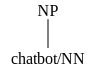

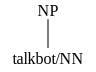

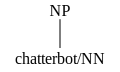

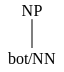

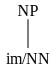

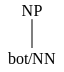

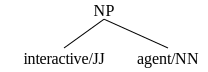

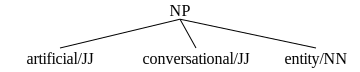

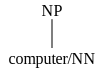

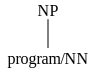

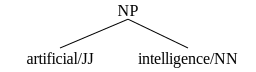

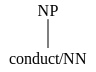

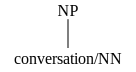

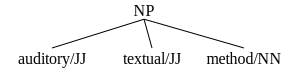

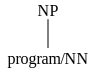

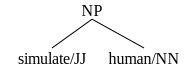

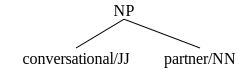

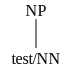

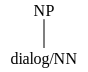

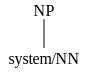

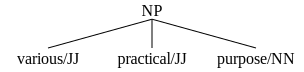

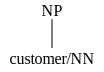

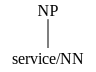

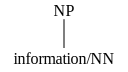

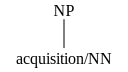

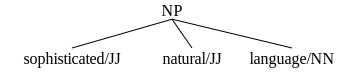

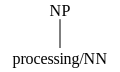

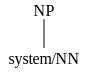

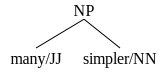

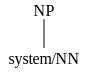

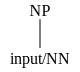

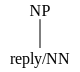

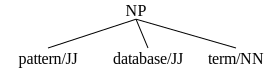

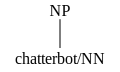

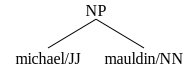

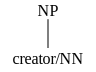

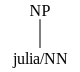

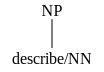

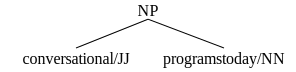

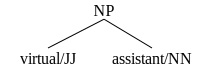

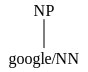

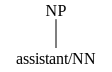

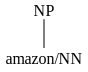

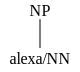

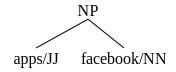

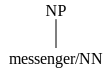

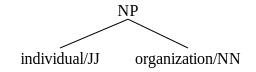

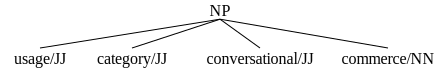

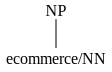

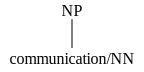

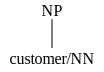

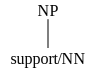

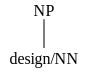

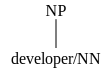

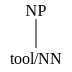

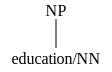

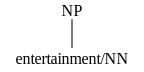

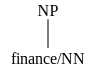

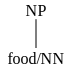

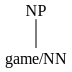

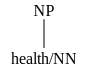

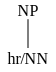

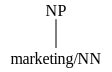

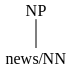

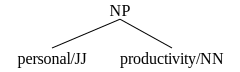

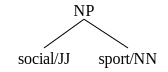

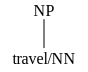

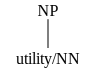

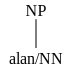

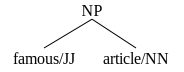

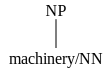

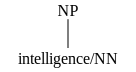

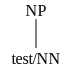

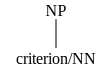

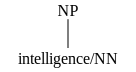

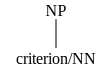

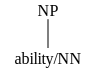

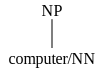

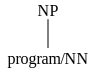

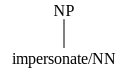

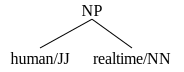

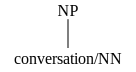

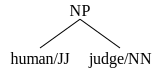

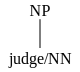

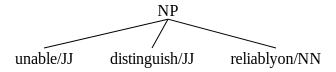

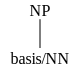

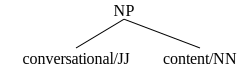

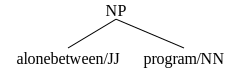

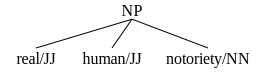

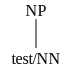

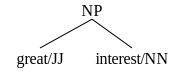

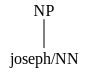

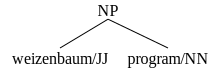

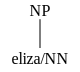

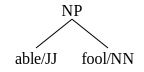

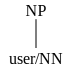

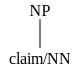

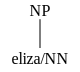

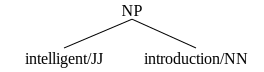

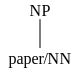

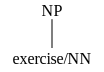

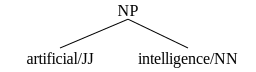

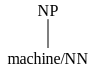

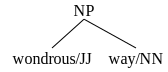

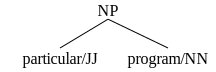

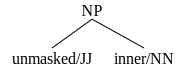

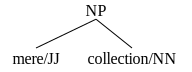

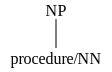

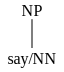

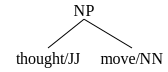

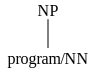

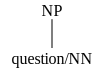

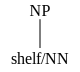

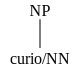

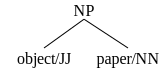

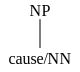

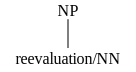

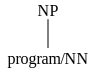

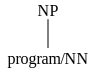

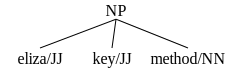

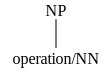

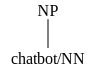

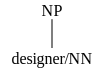

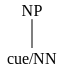

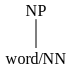

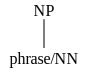

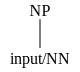

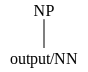

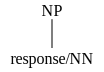

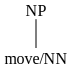

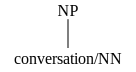

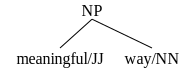

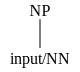

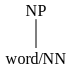

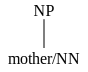

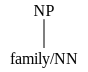

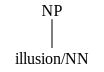

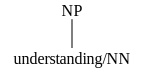

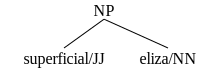

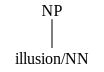

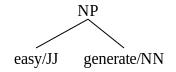

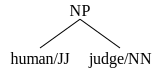

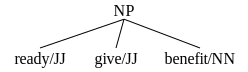

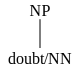

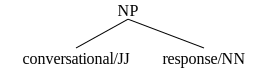

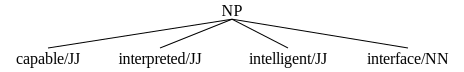

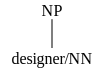

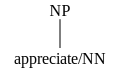

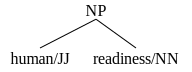

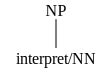

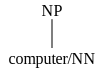

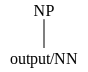

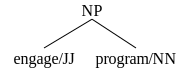

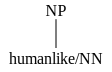

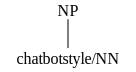

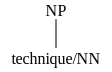

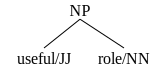

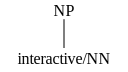

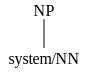

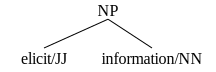

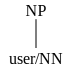

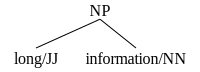

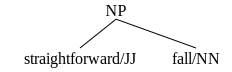

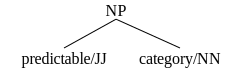

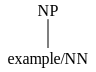

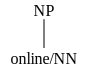

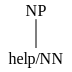

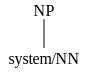

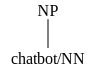

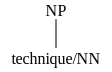

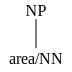

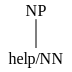

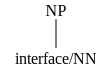

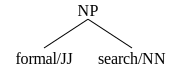

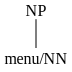

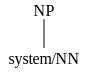

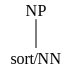

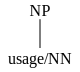

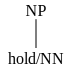

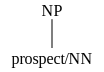

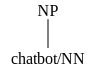

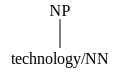

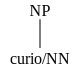

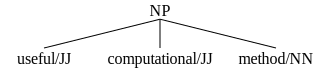

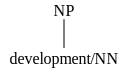

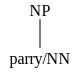

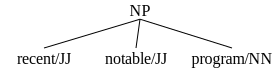

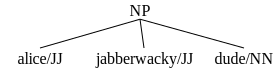

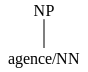

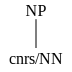

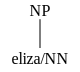

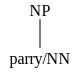

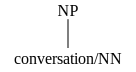

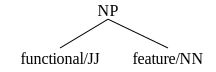

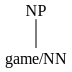

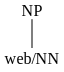

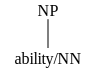

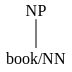

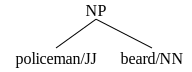

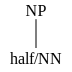

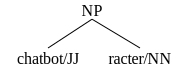

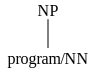

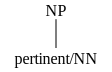

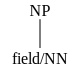

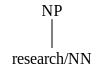

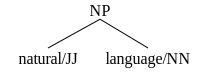

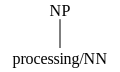

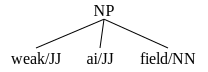

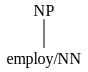

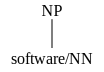

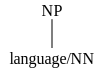

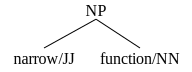

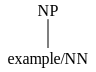

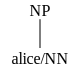

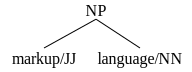

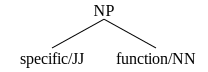

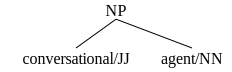

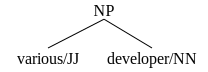

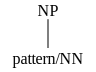

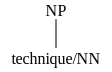

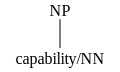

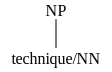

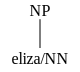

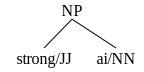

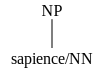

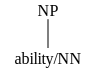

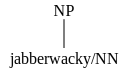

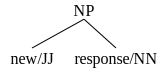

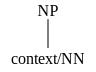

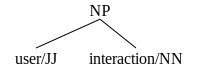

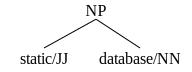

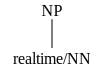

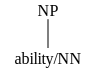

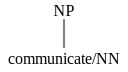

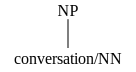

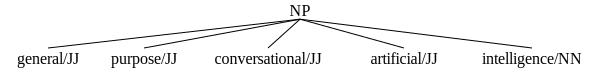

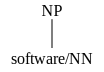

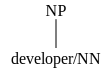

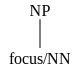

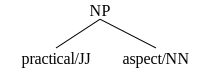

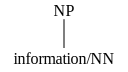

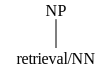

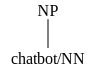

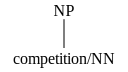

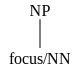

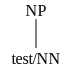

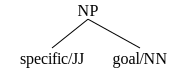

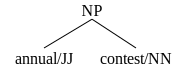

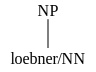

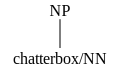

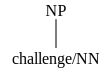

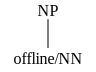

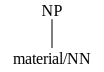

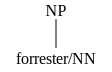

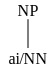

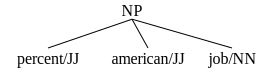

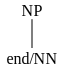

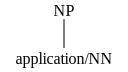

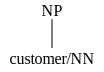

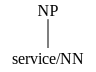

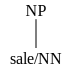

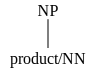

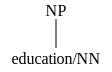

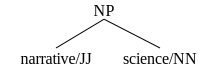

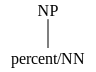

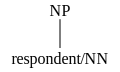

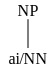

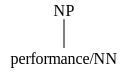

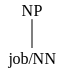

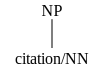

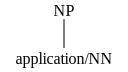

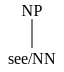

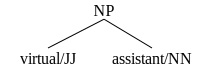

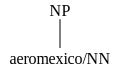

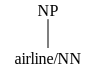

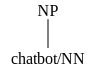

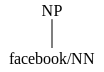

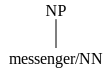

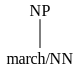

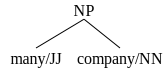

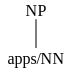

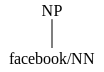

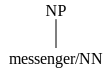

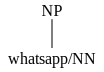

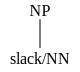

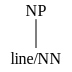

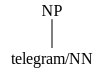

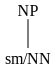

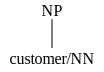

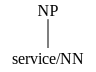

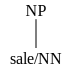

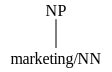

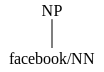

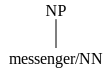

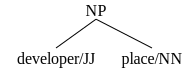

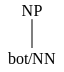

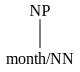

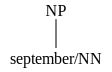

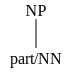

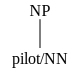

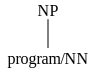

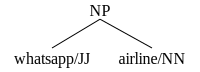

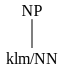

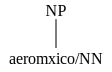

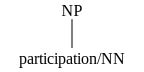

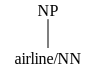

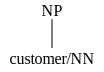

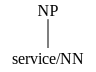

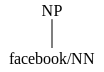

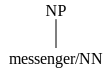

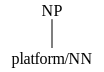

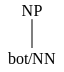

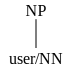

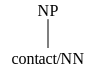

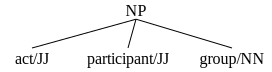

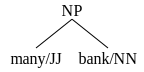

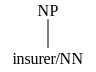

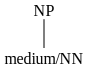

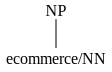

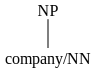

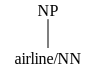

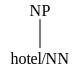

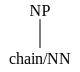

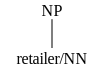

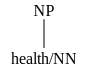

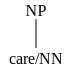

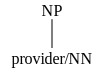

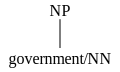

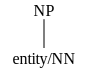

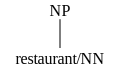

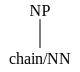

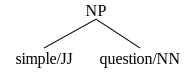

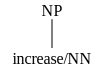

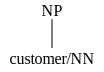

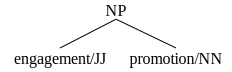

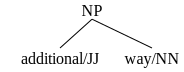

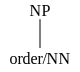

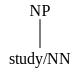

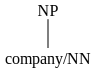

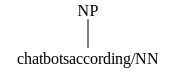

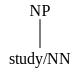

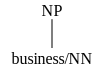

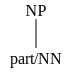

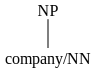

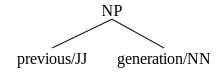

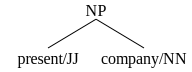

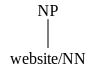

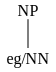

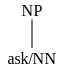

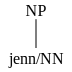

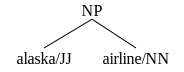

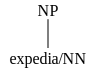

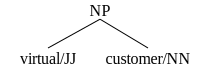

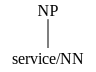

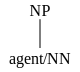

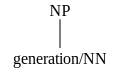

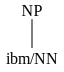

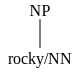

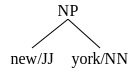

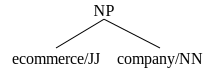

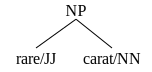

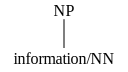

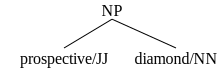

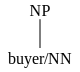

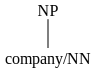

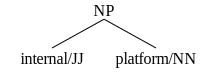

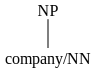

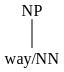

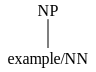

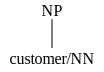

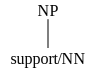

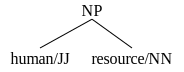

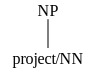

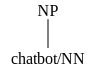

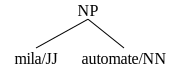

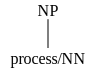

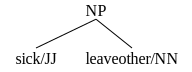

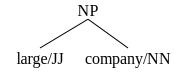

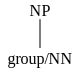

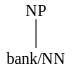

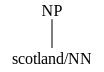

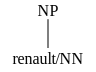

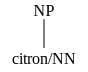

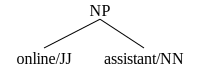

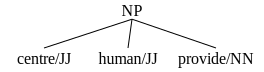

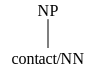

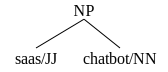

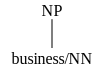

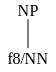

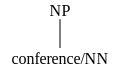

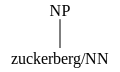

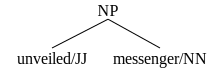

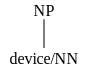

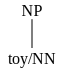

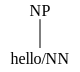

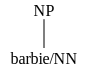

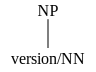

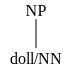

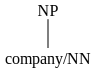

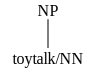

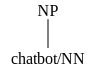

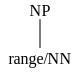

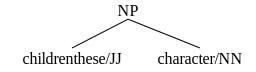

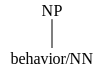

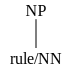

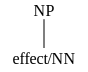

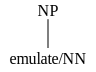

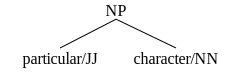

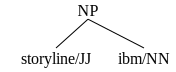

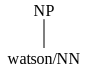

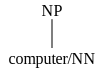

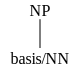

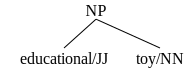

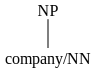

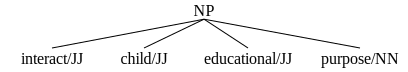

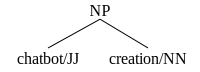

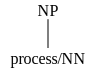

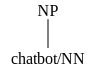

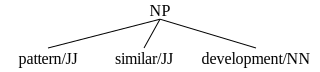

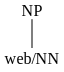

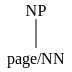

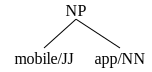

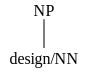

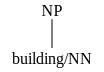

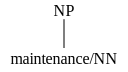

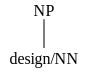

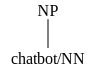

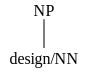

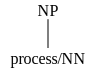

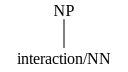

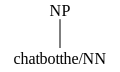

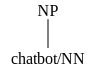

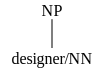

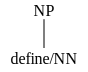

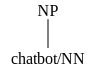

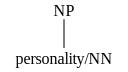

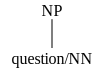

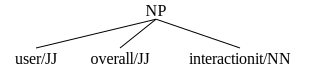

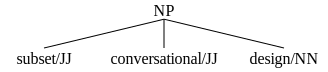

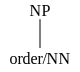

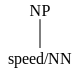

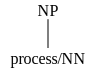

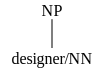

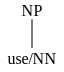

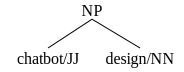

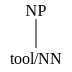

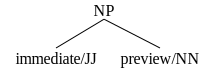

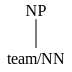

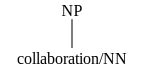

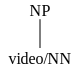

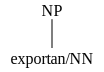

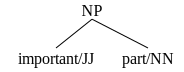

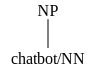

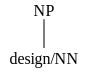

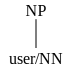

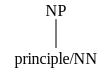

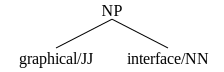

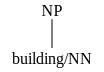

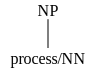

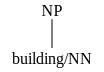

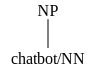

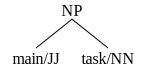

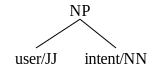

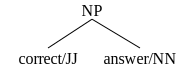

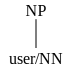

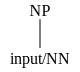

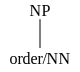

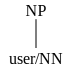

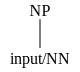

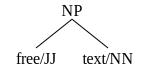

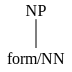

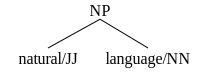

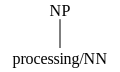

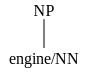

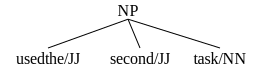

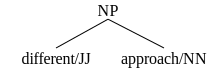

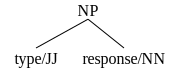

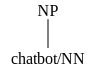

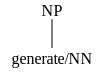

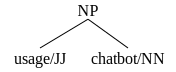

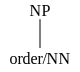

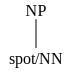

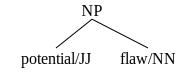

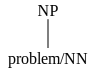

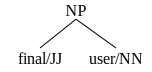

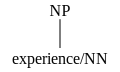

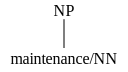

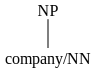

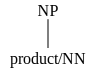

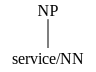

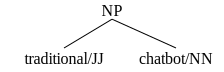

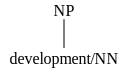

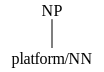

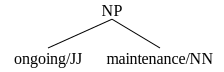

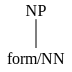

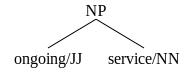

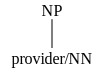

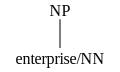

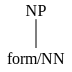

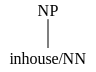

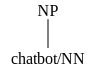

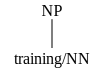

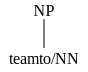

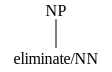

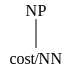

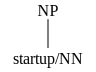

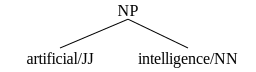

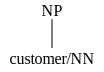

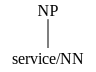

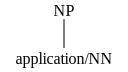

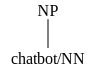

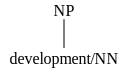

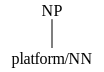

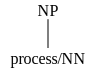

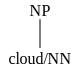

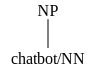

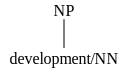

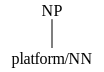

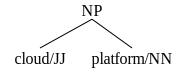

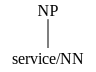

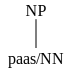

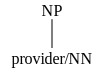

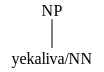

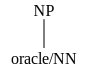

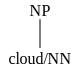

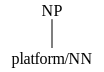

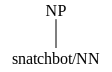

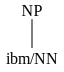

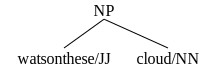

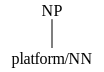

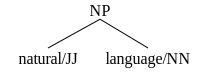

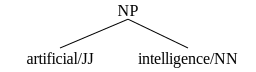

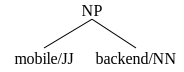

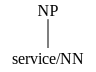

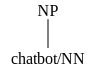

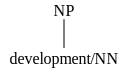

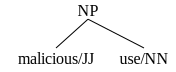

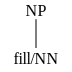

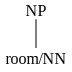

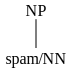

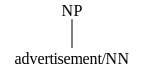

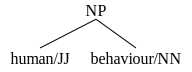

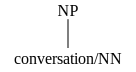

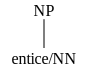

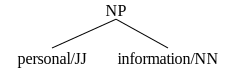

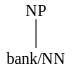

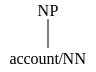

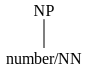

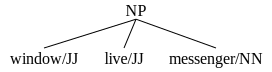

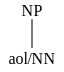

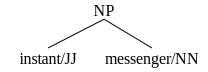

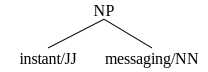

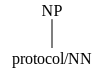

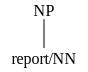

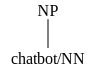

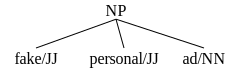

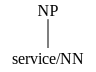

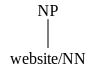

In [36]:
for subtree in tree.subtrees():
  display(subtree)